In [11]:
def shuffle_pixel(batch,images,L,idx):
    #input: image batchxLxLx3
    #output: image batchxLxLx3 (after shuffling)

    images=images.reshape(batch,L*L,3)

    #shuffle
    #x=x[[0,1,2,3],:]
    images=images[:,idx,:]
    images=images.reshape(batch,L,L,3)
    return images
    

# L=2
# #random idx
# idx=np.arange(L*L)
# np.random.shuffle(idx)


# images=np.array([
#     [[[10,15,20],[11,16,21]],[[12,17,22],[13,18,23]]],
#     [[[20,25,30],[21,26,31]],[[22,27,32],[23,28,33]]],
#     [[[30,35,40],[31,36,41]],[[32,37,42],[33,38,43]]],
# ])
# print(images.shape)
# images_new=shuffle_pixel(3,images,L,idx)
# print(images_new[0])
# print('===')
# print(images_new[1])
# print('===')
# print(images_new[2])
# print('===')
# print(images_new.shape)


In [3]:
import matplotlib.pyplot as plt


import h5py
import tensorflow as tf

from keras.datasets import cifar10
from keras.models import Sequential, load_model


from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, AveragePooling2D, MaxPooling2D

from keras.regularizers import l2
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers
from keras import models

from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)


Using TensorFlow backend.


In [ ]:
# Preprocessing data : rescaling and relocating number (exp 1)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 545s 3us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# Shuffle image

In [13]:
L=X_train.shape[1]#32
#random idx
idx=np.arange(L*L)
np.random.shuffle(idx)


X_train_new=shuffle_pixel(X_train.shape[0],X_train,L,idx)
X_test_new=shuffle_pixel(X_test.shape[0],X_test,L,idx)


In [14]:
print(X_train_new.shape)
print(X_test_new.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


317790


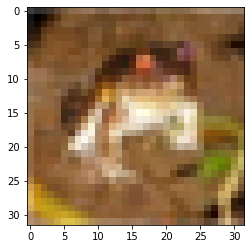

In [22]:
plt.imshow(X_train[0])
print(np.sum(X_train[0]))

317790


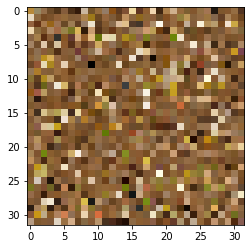

In [21]:
plt.imshow(X_train_new[0])
print(np.sum(X_train_new[0]))

In [23]:
# # reshape X_train and X_test TO (batch_size, channel, height, width)
# #X_train_new = X_train_new.reshape(X_train_new.shape[0], 1, L, L).astype('float32')
# X_train_new = X_train_new.reshape(X_train_new.shape[0], L, L,1).astype('float32')

# #X_test_new = X_test_new.reshape(X_test_new.shape[0], 1, L, L).astype('float32')
# X_test_new = X_test_new.reshape(X_test_new.shape[0],L, L,1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train_new = X_train_new / 255

X_test_new = X_test_new / 255

#split test set to val and test set
X_train_new, X_val_new, y_train, y_val = train_test_split(X_train_new, y_train, test_size=0.1)
                                                          #,random_state=0)



In [24]:
X_train_new.shape

(45000, 32, 32, 3)

In [25]:
# one-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)



In [26]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(45000, 10)
(10000, 10)
(5000, 10)


In [ ]:
# Define model

In [27]:
L

32

In [14]:
# epoch_num = 20
# batch_size = 256
# optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, 
#                             decay=0.0, amsgrad=False)


# model = create_neural_network_model(size, opt=optimizer)

# # model.save('models/experiment_{}.{}_.h5'.format(experiment_index, experiment_subindex))

# model.summary()

In [30]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

input_shape=(L,L,3)
num_classes=10

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [ ]:
batch_size = 32
num_classes = 10
epochs = 100

model.fit(X_train_new, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val_new, y_val))

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 101s 2ms/step - loss: 2.0364 - accuracy: 0.2373 - val_loss: 1.9275 - val_accuracy: 0.2958
Epoch 2/100
45000/45000 [==============================] - 90s 2ms/step - loss: 1.8968 - accuracy: 0.3041 - val_loss: 1.8631 - val_accuracy: 0.3370
Epoch 3/100
45000/45000 [==============================] - 104s 2ms/step - loss: 1.7980 - accuracy: 0.3502 - val_loss: 1.7195 - val_accuracy: 0.3772
Epoch 4/100
45000/45000 [==============================] - 96s 2ms/step - loss: 1.7140 - accuracy: 0.3827 - val_loss: 1.6806 - val_accuracy: 0.3996
Epoch 5/100
45000/45000 [==============================] - 96s 2ms/step - loss: 1.6571 - accuracy: 0.4051 - val_loss: 1.7301 - val_accuracy: 0.3968
Epoch 6/100
45000/45000 [==============================] - 97s 2ms/step - loss: 1.6138 - accuracy: 0.4218 - val_loss: 1.6065 - val_accuracy: 0.4262
Epoch 7/100
45000/45000 [==============================] - 95

In [ ]:
score = model.evaluate(X_test_new, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])